## Code Description

This code performs an analysis of the spread between several cryptocurrencies using data from Yahoo Finance and visualizes the results in an interactive plot. Below are the main steps:

1. **Library Imports:**
   - `pandas` for data manipulation.
   - `yfinance` for downloading cryptocurrency data.
   - `plotly.graph_objs` for creating the interactive plot.

2. **Data Download:**
   - The cryptocurrency symbols of interest are specified: Bitcoin (BTC-USD), Ethereum (ETH-USD), Litecoin (LTC-USD), and Bitcoin Cash (BCH-USD).
   - The date range for the historical data is defined from January 1, 2023, to January 1, 2024.
   - Daily closing price data for the cryptocurrencies is downloaded using `yfinance`.

3. **Spread Calculation:**
   - Beta coefficients for each cryptocurrency relative to Bitcoin are defined.
   - The spread is calculated using the formula:
    
   $$
   \text{spread} = \text{BTC} - \beta_1 \times \text{ETH} - \beta_2 \times \text{LTC} - \beta_3 \times \text{BCH}
   $$
     

4. **Spread Visualization:**
   - A figure is created using `plotly` and a trace representing the calculated spread is added.
   - The plot is customized with a title and axis labels.
   - Finally, the interactive plot is displayed.

This methodology allows observing the relationship between different cryptocurrencies through the calculated spread, providing a visual tool for financial analysis.

In [7]:
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go

# Descargar datos de Yahoo Finance
tickers = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BCH-USD']
start_date = '2023-01-01'
end_date = '2024-01-01'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calcular el spread
betas = {'BTC-USD': 1, 'ETH-USD': -0.795, 'LTC-USD': -27.02, 'BCH-USD': -1.838}
spread = data[tickers[0]]
for ticker, beta in betas.items():
    spread -= beta * data[ticker]

# Graficar el spread
fig = go.Figure()
fig.add_trace(go.Scatter(x=spread.index, y=spread, mode='lines', name='Spread'))
fig.update_layout(title='Spread BTC - β1 * ETH - β2 * LTC - β3 * BCH',
                  xaxis_title='Date',
                  yaxis_title='Spread Value')
fig.show()


[*********************100%***********************]  4 of 4 completed


## Code Description

This code performs a backtesting of a mean reversion strategy on a spread between several cryptocurrencies using data from Yahoo Finance. The process includes downloading data, calculating the spread, executing a mean reversion strategy, and visualizing the results.

### 1. Data Download
- The cryptocurrencies of interest are specified: Bitcoin (BTC-USD), Ethereum (ETH-USD), Litecoin (LTC-USD), and Bitcoin Cash (BCH-USD).
- The historical data range is set from January 1, 2023, to January 1, 2024.
- The daily closing prices for these cryptocurrencies are downloaded.

### 2. Spread Calculation
- Beta coefficients for each cryptocurrency relative to Bitcoin are defined.
- The spread is calculated using these coefficients to create a linear combination of the cryptocurrencies.

### 3. Mean Reversion Backtesting
- An initial capital of $100,000 is set.
- Positions in Bitcoin, Ethereum, Litecoin, and Bitcoin Cash are managed based on the spread value.
- Buy signals are triggered when the spread falls below 3500, leading to a long position in Bitcoin and short positions in the other cryptocurrencies.
- Sell signals are triggered when the spread rises above 4500, closing the positions and recalculating the capital.
- Results of each trading action are stored, including the date, action (buy/sell), spread value, and capital after the action.

### 4. Visualization
- The spread is plotted over time with buy and sell signals marked.
- The capital performance over time is also plotted.
- The results of the backtesting, including all trades and corresponding capital values, are displayed in a DataFrame.

### Results
- The results DataFrame shows the date, action taken, spread value at the time of the action, and the capital after the action.
- Plots provide a visual representation of the trading signals on the spread and the capital performance over the backtesting period.

[*********************100%***********************]  4 of 4 completed


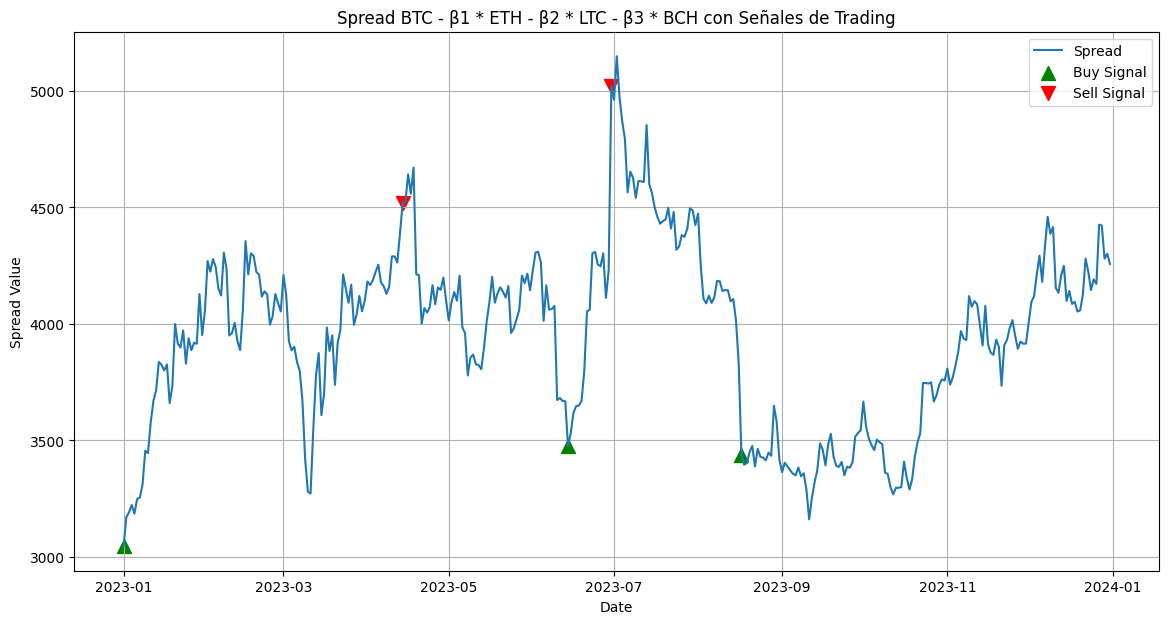

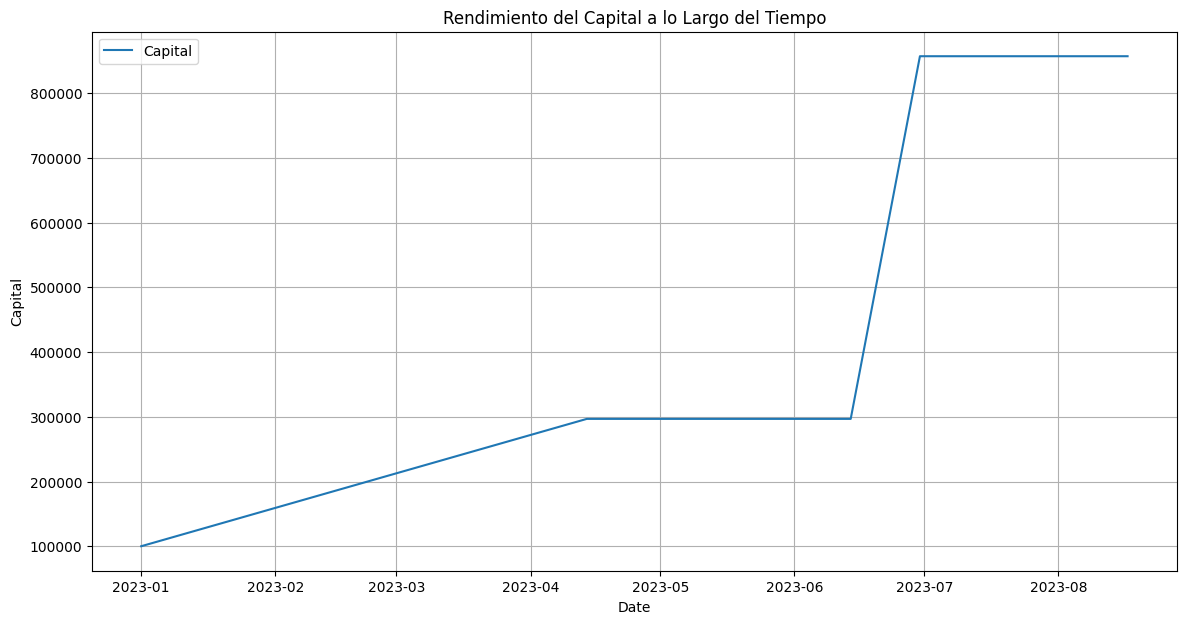

        Date Action        Price        Capital
0 2023-01-01    BUY  3046.409565  100000.000000
1 2023-04-14   SELL  4520.458163  296772.844676
2 2023-06-14    BUY  3476.130528  296772.844676
3 2023-06-30   SELL  5020.115205  857179.474705
4 2023-08-17    BUY  3437.165814  857179.474705


In [8]:
import matplotlib.pyplot as plt

# Descargar datos de Yahoo Finance
tickers = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BCH-USD']
start_date = '2023-01-01'
end_date = '2024-01-01'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calcular el spread
betas = {'BTC-USD': 1, 'ETH-USD': -0.795, 'LTC-USD': -27.02, 'BCH-USD': -1.838}
spread = data[tickers[0]]
for ticker, beta in betas.items():
    spread -= beta * data[ticker]

# Backtesting de reversión a la media
capital = 100000  # Capital inicial
btc_position = 0
eth_position = 0
ltc_position = 0
bch_position = 0
entry_price = 0
results = []

for i in range(len(spread)):
    if spread[i] <= 3500 and btc_position == 0:
        # Comprar Bitcoin y vender el resto
        btc_position = capital / data['BTC-USD'][i]
        eth_position = -btc_position * betas['ETH-USD']
        ltc_position = -btc_position * betas['LTC-USD']
        bch_position = -btc_position * betas['BCH-USD']
        entry_price = spread[i]
        results.append((spread.index[i], 'BUY', spread[i], capital))
    elif spread[i] >= 4500 and btc_position != 0:
        # Vender Bitcoin y comprar el resto
        capital = btc_position * data['BTC-USD'][i]
        capital += eth_position * data['ETH-USD'][i]
        capital += ltc_position * data['LTC-USD'][i]
        capital += bch_position * data['BCH-USD'][i]
        btc_position = 0
        eth_position = 0
        ltc_position = 0
        bch_position = 0
        results.append((spread.index[i], 'SELL', spread[i], capital))

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'Action', 'Price', 'Capital'])

# Graficar el spread con señales de compra y venta
plt.figure(figsize=(14, 7))
plt.plot(spread.index, spread, label='Spread')
buy_signals = results_df[results_df['Action'] == 'BUY']
sell_signals = results_df[results_df['Action'] == 'SELL']
plt.scatter(buy_signals['Date'], buy_signals['Price'], marker='^', color='g', label='Buy Signal', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Price'], marker='v', color='r', label='Sell Signal', s=100)
plt.title('Spread BTC - β1 * ETH - β2 * LTC - β3 * BCH con Señales de Trading')
plt.xlabel('Date')
plt.ylabel('Spread Value')
plt.legend()
plt.grid()
plt.show()

# Graficar el rendimiento del capital
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Capital'], label='Capital')
plt.title('Rendimiento del Capital a lo Largo del Tiempo')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid()
plt.show()

# Mostrar resultados del backtesting
print(results_df)
